In [1]:
import pandas as pd

def handle_time(df,col):
    df[col] = pd.to_datetime(df[col])
    df[col] = pd.to_datetime(df[col])
    df = df.set_index(col, drop=True)
    return df

In [2]:
returns = pd.read_csv('result/returns.csv')
transactions = pd.read_csv('result/transactions.csv')
positions = pd.read_csv('result/positions.csv')
gross_lev = pd.read_csv('result/gross_lev.csv')

returns = handle_time(returns,'index')
transactions = handle_time(transactions, 'date')
positions = handle_time(positions,'Datetime')
gross_positions = handle_time(gross_lev,'index')

In [3]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

/Users/cholian/opt/anaconda3/envs/TMpf/lib/python3.9/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


TypeError: cannot unpack non-iterable NoneType object

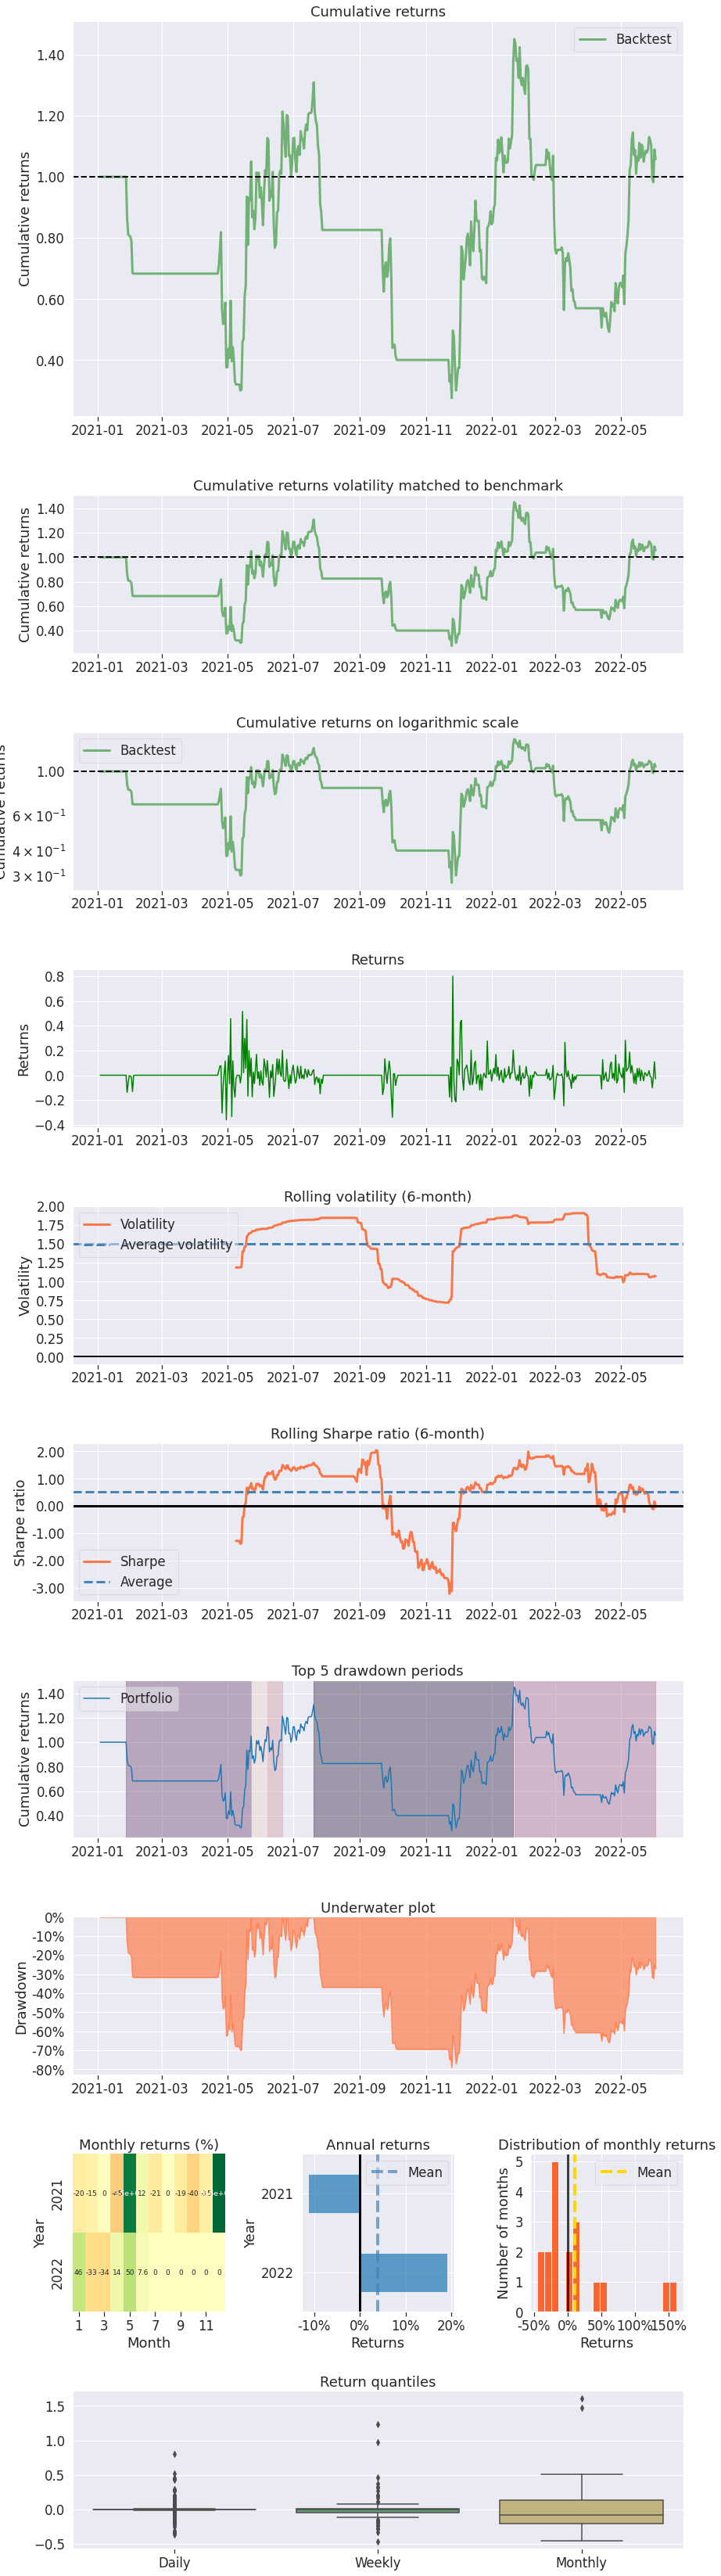

In [6]:
pf.create_returns_tear_sheet(returns['return'], 
                            #  live_start_date='2022-4-1'
                             )

In [9]:
pystats_df = pf.timeseries.perf_stats(returns['return'], positions=positions, transactions=transactions)

In [10]:
pystats_df

Annual return           0.027645
Cumulative returns      0.057313
Annual volatility       1.412884
Sharpe ratio            0.668480
Calmar ratio            0.035031
Stability               0.000037
Max drawdown           -0.789168
Omega ratio             1.207851
Sortino ratio           1.168397
Skew                    2.378371
Kurtosis               19.943690
Tail ratio              1.124422
Daily value at risk    -0.174259
Gross leverage          1.432175
Daily turnover          0.065493
dtype: float64

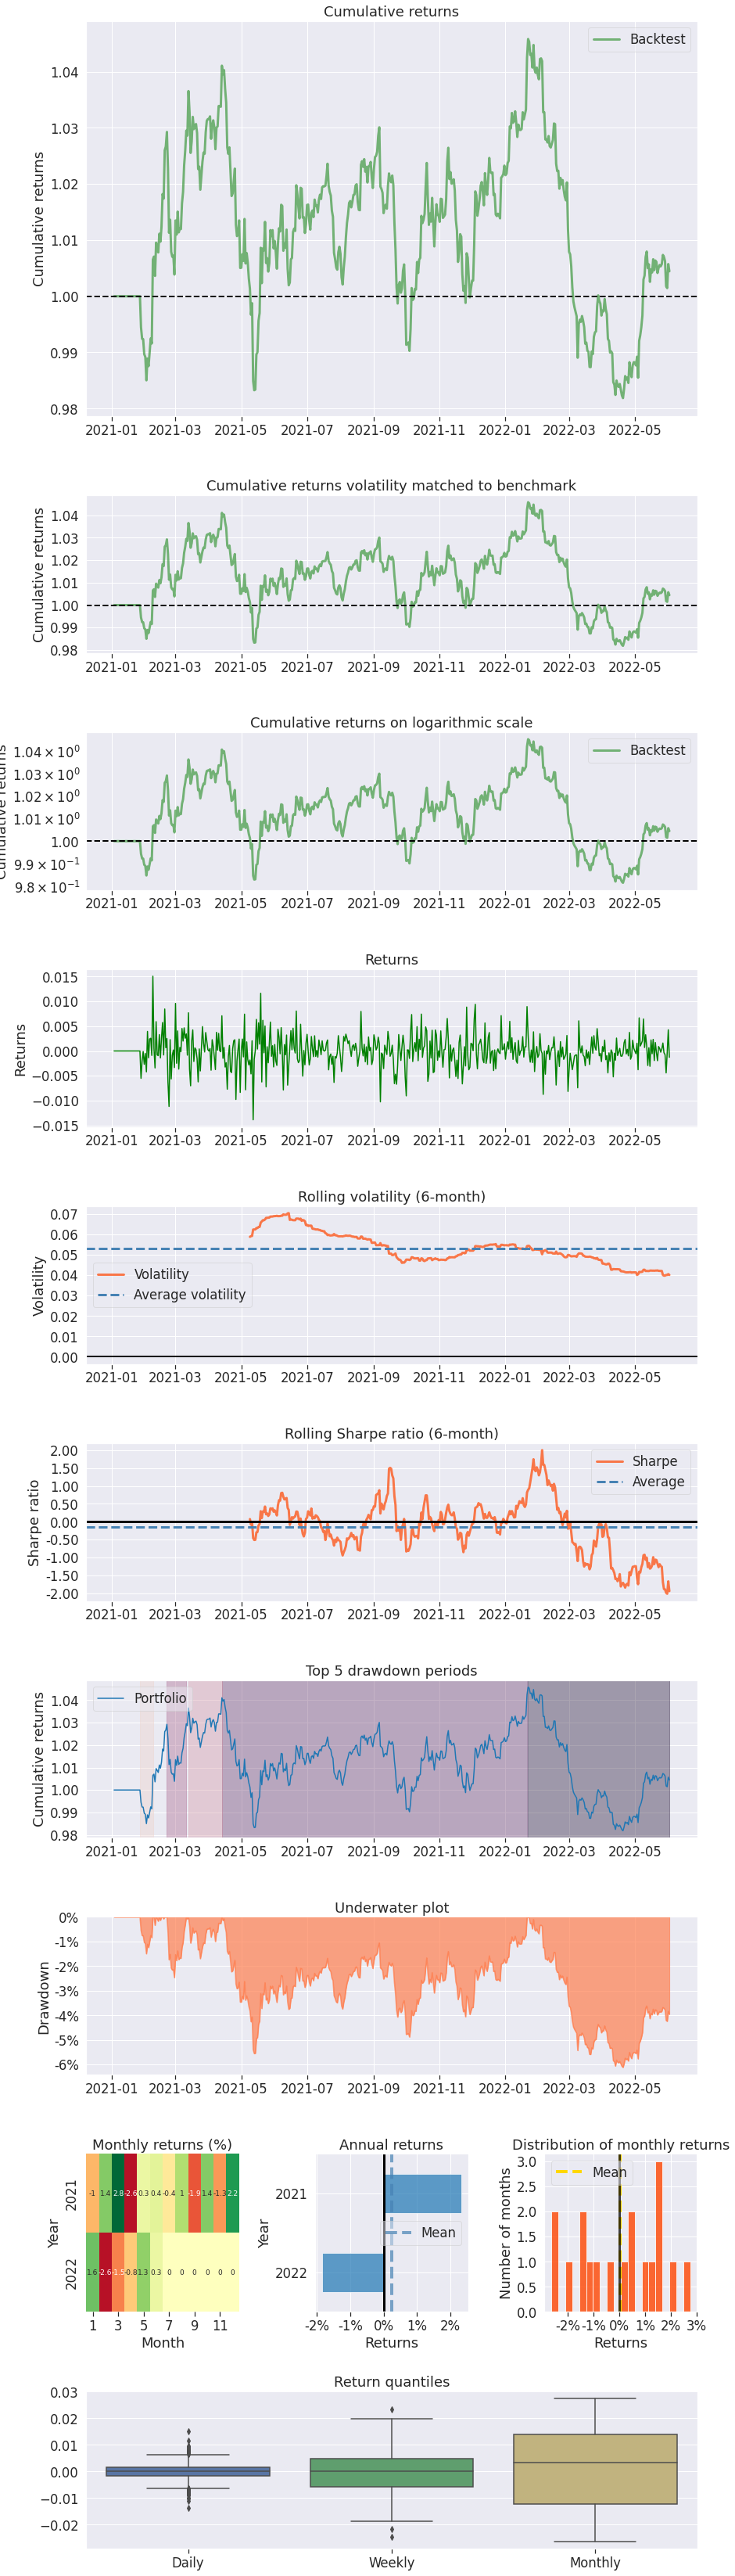

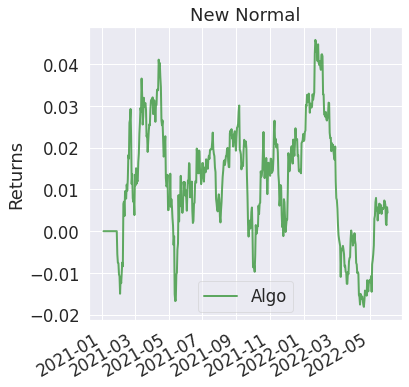

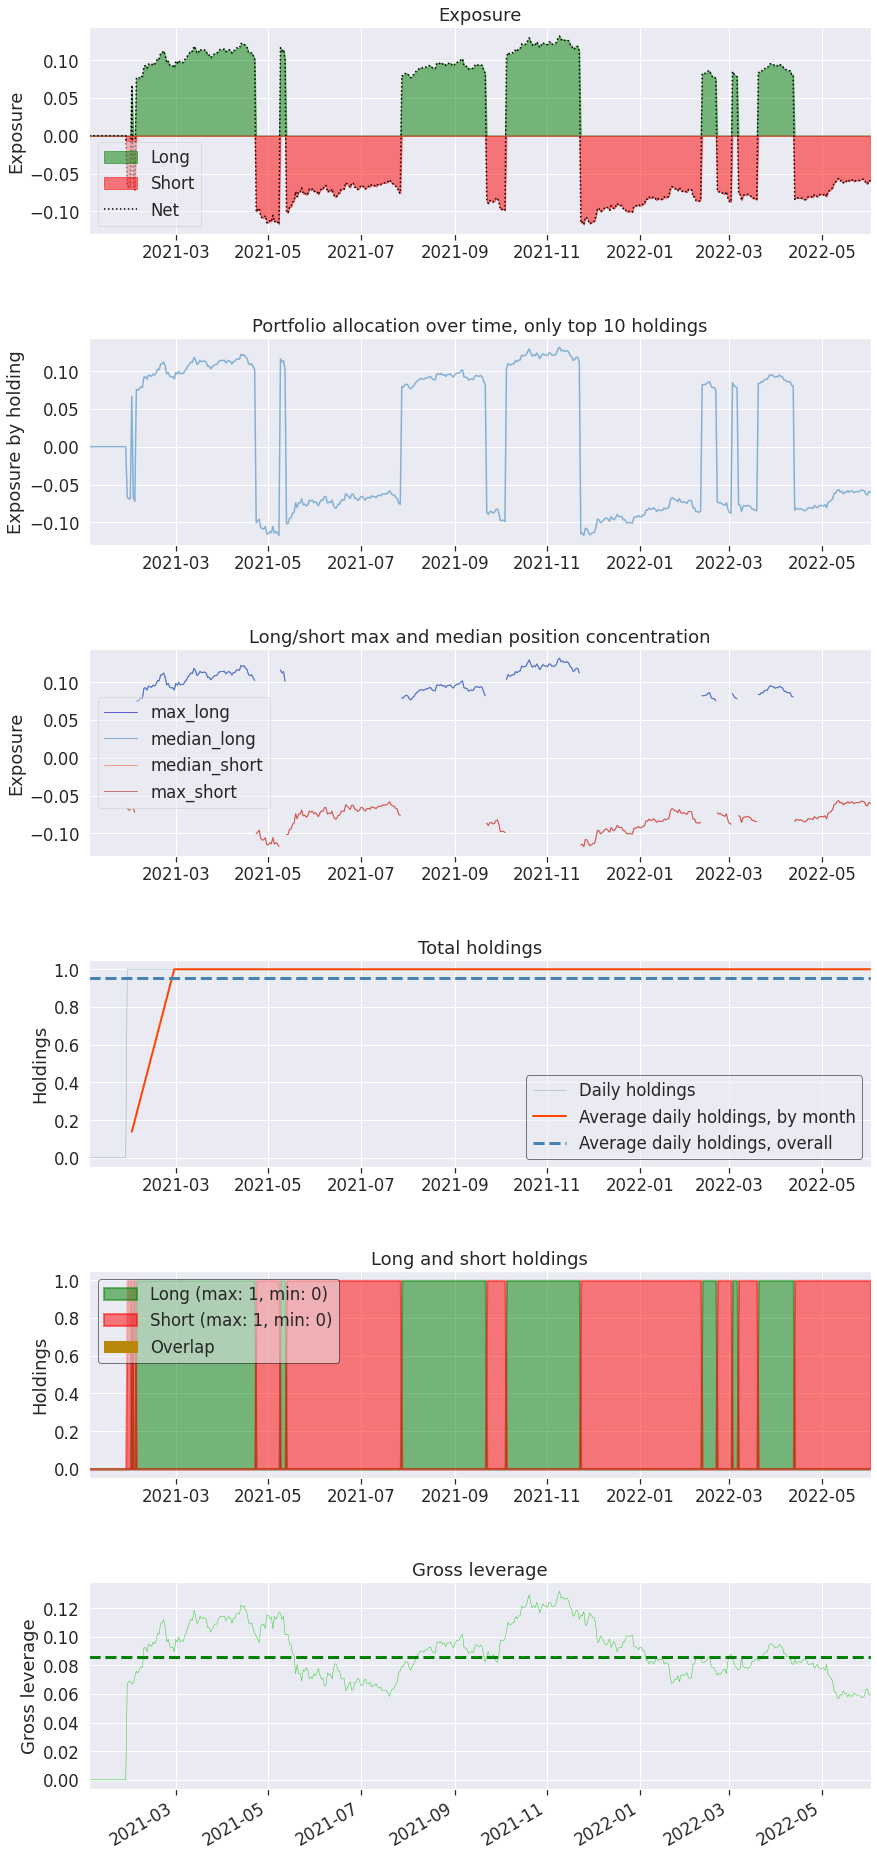

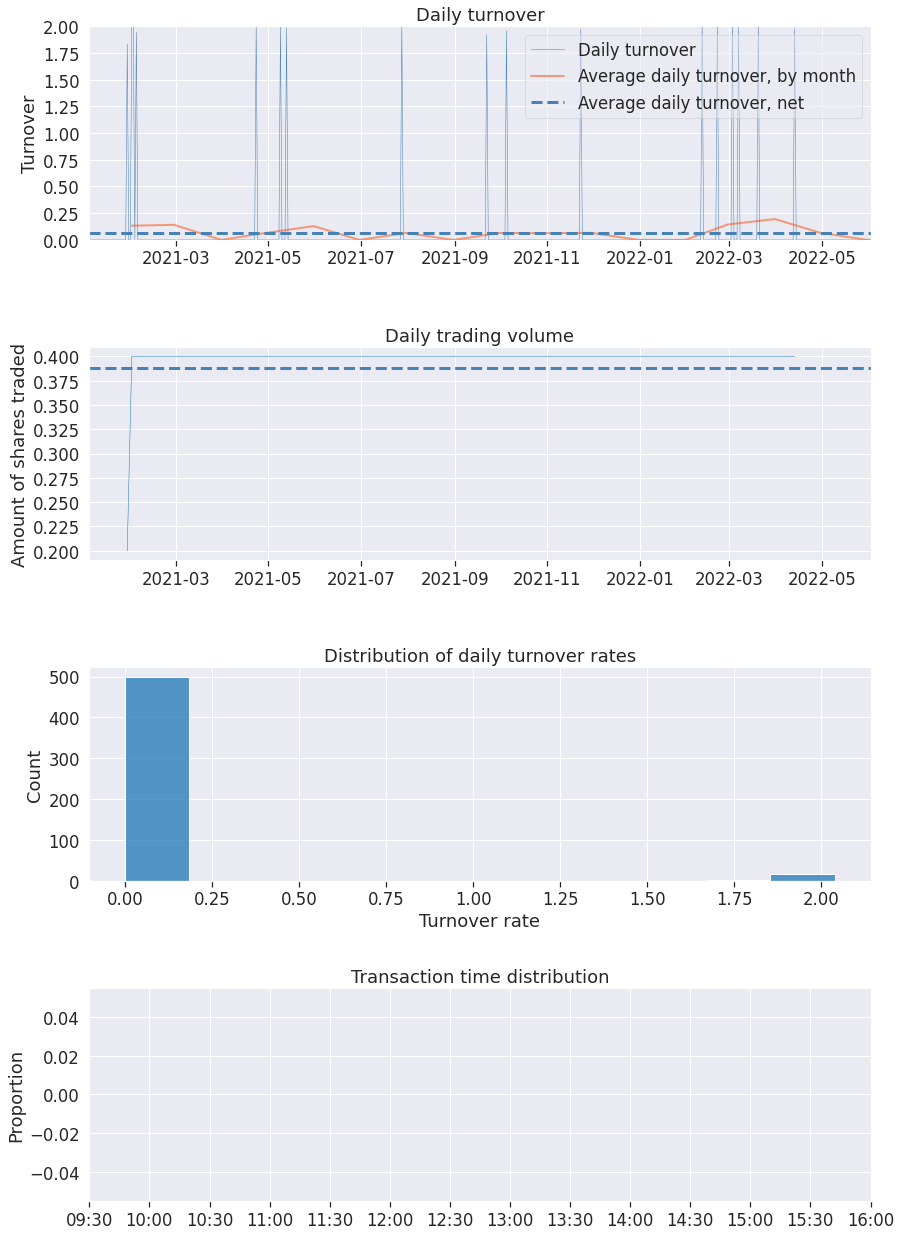

In [16]:
pf.create_full_tear_sheet(returns['return'], positions=positions, transactions=transactions,
                        #   live_start_date='2022-04-01', 
                          hide_positions=True)